### Data Sceince проект:

Участие в соревновании Kaggle

Ссылка на соревнование с описанием: https://www.kaggle.com/c/realestatepriceprediction/overview

Задача в этом соревновании - предсказать цены на квартиры 

**Решаемые в проекте задачи:**

Постановка задачи

Получение данных

Анализ данных

Визуализация данных

Предобработка данных

Генерация новых признаков

Построение модели

Оценка качества

Внедрение модели

Мониторинг качества и улучшение модели

### Подключение библиотек и скриптов

In [122]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from lightgbm import LGBMRegressor

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

# Удаление ненужных файлов
import gc # сборщик мусора

# Для работы со временем
import datetime # для работы со времнем
import time

# Для работы с сохранением файлов
from pathlib import *

In [123]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

### Пути к директориям и файлам

In [124]:
DATASET_PATH = 'train.csv'
PREPARED_DATASET_PATH = 'prepared_train.csv'
TEST_DATASET_PATH = 'test.csv'
PREPARED_TEST_DATASET_PATH = 'prepared_test.csv'

### 1. Загрузка данных

In [125]:
df = pd.read_csv(DATASET_PATH, sep=',')
df_final = pd.read_csv(TEST_DATASET_PATH, sep=',')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [126]:
df.shape

(10000, 20)

In [127]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [128]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### 2. Обзор количественных переменных

In [130]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [131]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### 3. Обзор номинативных переменных

In [132]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [133]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [134]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [135]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### 4.Формирование гипотиз по даным в Трейне

Гипотезы по выбросам и аномалиям:

    1. DistrictId - не может равняться 0
    
    2. Rooms - - не может равняться 0. При кол-ве комнат больше 5 - проверять среднюю площадь комнаты, 
    если площадь комнаты меньше  8, то такой комнаты быть не может
    
    3. Square - не может быть меньше 17 кв.м.  ВОзьмем за минимальную площадь всей квартиры 17 кв.м
    Также не может быть меньше чем LifeSquare или KitchenSquare
    
    4. LifeSquare - не может быть 0,37 - минимальная жилая плащадь принимается как 10. 
    Также не может быть больше чем Square
    
    Также LifeSquare не может быть больше общей Square. Площадь квартиры больше 700 кв.м. - это явный выброс (7480 кв.м. квартиры быть не может)
    
    5. KitchenSquare - не может быть 0 и не может быть больше 30 кв.м. (см. выброс 2014 кв.м. на кухню)
    Также не может быть больше чем Square или LifeSquare
    
    6. Floor - видимых выбросов не видно, но проверить существование 42 этажей в МО. Установить предел в 30 этажей
    
    7. HouseFloor - Не может быть 0 этаж! 117 этажей в МО домов нет. Установить предел в 30 этажей.
    
    8. HouseYear - домов моложе 2020 года быть не может , меняем на медиану
    
    9. Healthcare_1 - кол-во пропусков 4798 (почти в половине случаев). Попробовать сделать два вариант- выбросить эту фичу, либо поменть на медиану
    
    10. Price - если цена сильно отличается от средней в расчете за кв.м. - тоже убираем, либо приводим к медиане

### 5. Подготовка данных 

**Попробуем сначала создать новые фичи, которые помогут нам увидеть выбросы и аномалии**

In [136]:
class FeatureGenetator:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.binary_to_numbers = None        
       
        
    def fit(self, df):
        """Сохранение статистик"""
        self.medians = df.median()       
               

        
    def transform(self, df):
        """Трансформация данных"""
        
       # 1. Новые фичи (features)
        # Доля жилой площади в общей площади
        df['LifeSquareShare'] = df['LifeSquare'] / df['Square']

        #  Доля площади кухни в общей площади
        df['KitchenSquareShare'] = df['KitchenSquare'] / df['Square']
        
        #  Цена за кв.м.
        #df['PricePerSqMeter'] = df['Price'] / df['Square']
        
        #  Средняя площадь комнаты к квартире
        df['SqMeterPerRoom'] = 0 
        df.loc[(df['Rooms'] > 0), 'SqMeterPerRoom'] = df['Square'] / df['Rooms']
        
         
        #Вместо dummies пробуем использовать бинарыне числа на месте (в одном столбце)
        # Binary features

        self.binary_to_numbers = {'A': 0, 'B': 1}
        #df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0 
        df['Ecology_2'] = df['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        df['Ecology_3'] = df['Ecology_3'].map(self.binary_to_numbers)
        df['Shops_2'] = df['Shops_2'].map(self.binary_to_numbers)
        
        # 3. Новая категория этажности.        
        df['floor_cat'] = 0        
        df.loc[df['Floor'] == 1, 'floor_cat'] = 1         
        df.loc[(df['Floor'] >= 2) & (df['Floor'] <= 5), 'floor_cat'] = 2
        df.loc[(df['Floor'] > 5) & (df['Floor'] <= 9), 'floor_cat'] = 3
        df.loc[(df['Floor'] > 9) & (df['Floor'] <= 15), 'floor_cat'] = 4
        df.loc[df['Floor'] > 15, 'floor_cat'] = 5
        df.loc[df['Floor'] == df['HouseFloor'], 'floor_cat'] = 6
        
         # 4. Новая категория амортизации дома (возраста). 
        df['year_cat'] = 0        
        df.loc[df['HouseYear'] < 1941, 'year_cat'] = 1
        df.loc[(df['HouseYear'] >= 1941) & (df['HouseYear'] <= 1945), 'year_cat'] = 2
        df.loc[(df['HouseYear'] > 1945) & (df['HouseYear'] <= 1980), 'year_cat'] = 3
        df.loc[(df['HouseYear'] > 1980) & (df['HouseYear'] <= 2000), 'year_cat'] = 4
        df.loc[(df['HouseYear'] > 2000) & (df['HouseYear'] <= 2010), 'year_cat'] = 5
        df.loc[(df['HouseYear'] > 2010), 'year_cat'] = 6
        
        
        return df

In [137]:
df = pd.read_csv(DATASET_PATH, sep=',')
df_final = pd.read_csv(TEST_DATASET_PATH, sep=',')

feature = FeatureGenetator()
feature.fit(df)
df = feature.transform(df)
df_final = feature.transform(df_final)

In [138]:
# Отдельно для train работаем с 'PricePerSqMeter' и 'Price'
df['PricePerSqMeter'] = df['Price'] / df['Square']

In [139]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,...,1.319500,4.231300,0.917500,214138.857399,0.665885,0.123297,32.471946,3.345800,3.812500,3988.383777
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,...,1.493601,4.806341,0.275139,92872.293865,1.072916,0.749376,11.440036,1.299843,1.168452,3755.437224
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.006001,0.000000,0.000000,1.000000,1.000000,208.293451
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,...,0.000000,1.000000,1.000000,153872.633942,0.556235,0.022591,25.582108,2.000000,3.000000,2918.525328
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,1.000000,3.000000,1.000000,192269.644879,0.617527,0.120688,30.808279,3.000000,3.000000,3910.052336
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,...,2.000000,6.000000,1.000000,249135.462171,0.696916,0.165121,38.990762,4.000000,5.000000,4692.375993
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,...,6.000000,23.000000,1.000000,633233.466570,91.567973,61.034810,409.425181,6.000000,6.000000,230463.537966


### 6. Выявляем выбросы и аномалии

**В каждом случае формируем примечание "Внимание!" которое потом будет обрабатыватся в виде кода с коректировкой Датафрейма**

In [140]:
df.loc[:, 'Id':'HouseYear'].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07


In [141]:
df.loc[:, 'Id':'HouseYear'].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07


In [142]:
 # Внимание! Видим проблемы с неравномерным распределением обьектов недвижимости по районам. 
# Возможно необходимо принимать в расчет районы с большим кол-вом  квартир и исключать районы с небольшим кол-вом квартир 

In [143]:
df['Rooms'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., 10., 19.])

In [144]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [145]:
df.loc[df['Rooms'] == 0].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,0,1,1,302211.260887,0.992010,0.000000,0.0,2,5,1419.282909
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,0,0,1,268394.744389,0.984019,0.000000,0.0,2,6,1938.880408
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,...,0,1,1,219281.918007,0.969951,0.000000,0.0,2,3,2498.580012
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,...,0,0,1,212864.799112,NaN,0.000000,0.0,2,3,2612.112170
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,...,1,0,1,217009.338463,NaN,0.000000,0.0,5,6,4385.488771
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,...,0,1,1,98129.976788,NaN,0.000000,0.0,4,3,2348.119347
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,3,9,1,158998.110646,0.499911,0.232575,0.0,3,4,4108.784399
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,0,0,1,126596.941798,0.367293,0.000000,0.0,1,3,53253.578837


In [146]:
 # Внимание! в колонке Rooms есть значения = 0 - их надо заменить на значение Square/SqMeterPerRoom.mean() - Делим
# общую площадь квартиры на среднюю по датасету площадь комнаты

In [147]:
df.loc[df['Rooms'] > 5].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,...,2,4,1,172329.270863,0.631179,0.164281,6.087127,2,4,2831.044647
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,...,3,8,1,229661.964416,0.651396,0.100986,9.902389,3,3,3865.430271
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,...,5,15,1,317265.323792,0.613358,0.169328,5.905698,6,5,5372.190561
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,...,0,1,1,78364.616704,0.518480,0.166643,2.210845,6,6,1865.555669


In [148]:
df.loc[:, 'Id':'HouseYear'].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07


In [149]:
# Внимание! в колонке Rooms есть значения > 6 ,заменяем эти значения на медиану по кол-ву комнат в датасете

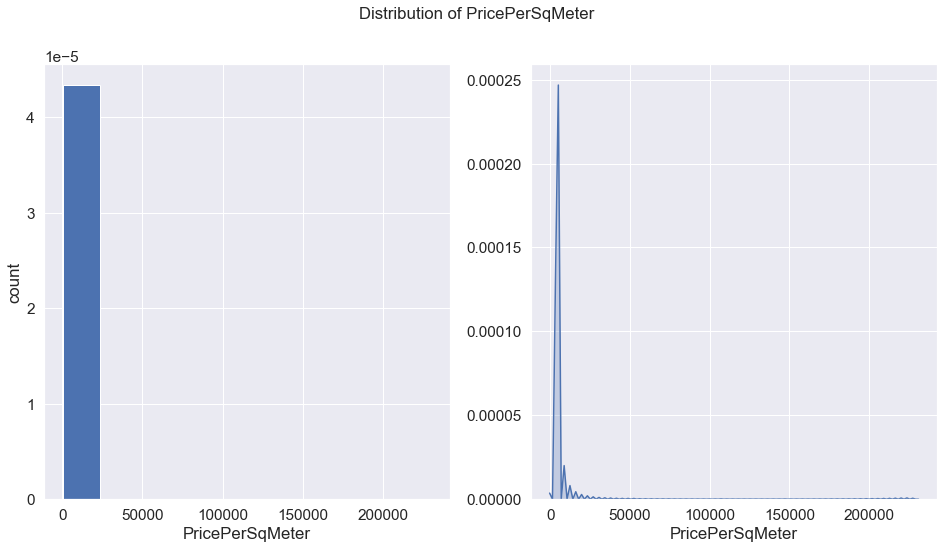

In [150]:
# PricePerSqMeter
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['PricePerSqMeter'].hist(density=True)
plt.ylabel('count')
plt.xlabel('PricePerSqMeter')

plt.subplot(122)
sns.kdeplot(df['PricePerSqMeter'], shade=True, legend=False)
plt.xlabel('PricePerSqMeter')

plt.suptitle('Distribution of PricePerSqMeter')
plt.show()


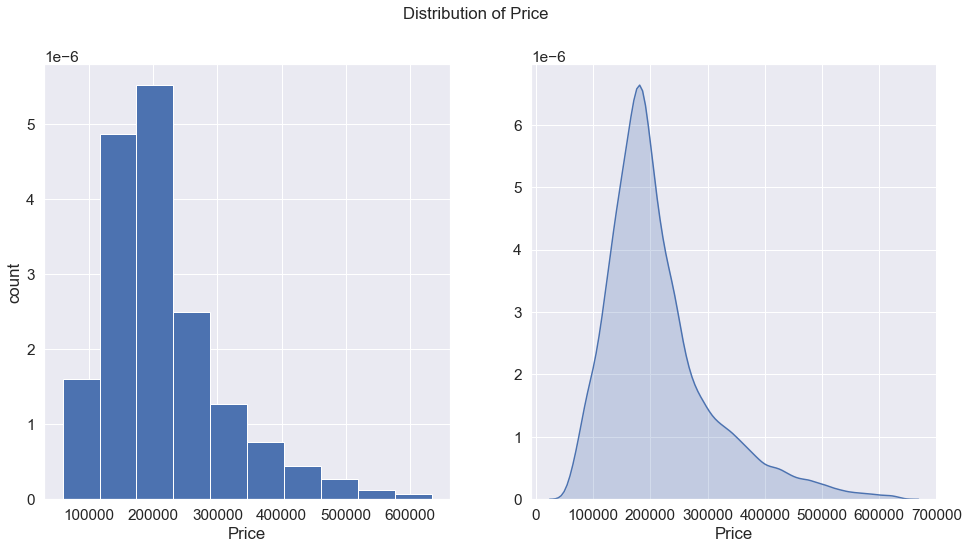

In [151]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

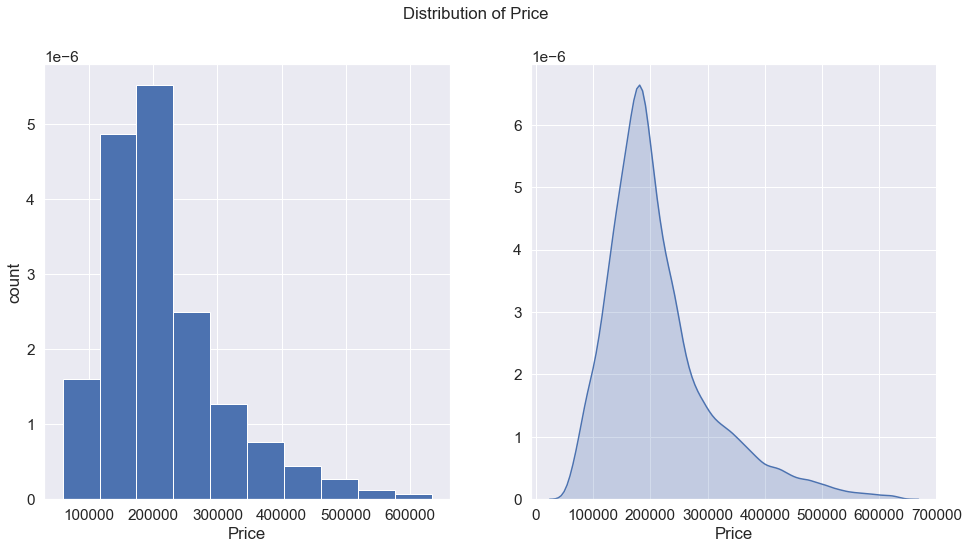

In [152]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


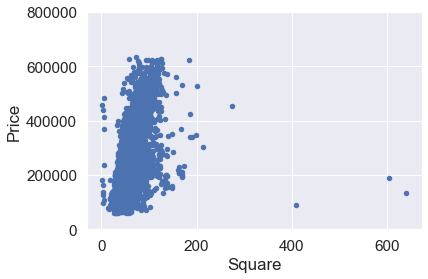

In [153]:
#scatter plot Square/price
var = 'Square'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


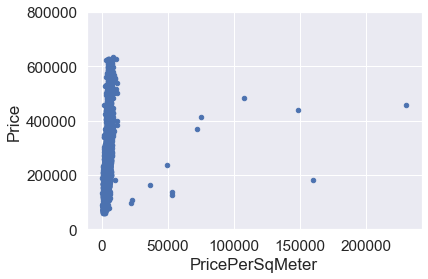

In [154]:
#scatter plot Square/PricePerSqMeter
var = 'PricePerSqMeter'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000));

In [155]:
df.loc[df['PricePerSqMeter'] > 20000].sort_values(['PricePerSqMeter'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,...,1,11,1,458378.777006,1.328454,0.502780,1.988943,5,3,230463.537966
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,...,0,1,1,181434.825589,3.980913,0.879617,1.136859,2,3,159593.107918
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,3,2,1,438005.182323,1.779529,0.338489,2.954309,2,3,148259.792432
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,...,0,7,1,483283.488083,1.025709,0.222085,4.502784,5,3,107329.937099
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,...,3,9,1,412511.088764,12.302704,0.181915,2.748531,5,3,75042.110444
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,...,4,5,1,369472.403061,1.081930,0.194961,5.129222,6,3,72032.840662
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,0,0,1,126596.941798,0.367293,0.000000,0.000000,1,3,53253.578837
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,0,0,1,137597.601458,1.773621,0.385156,2.596351,2,6,52996.529388
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,...,0,1,1,237716.681261,16.536747,0.000000,1.607893,3,3,49281.194174
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,0,1,1,161379.067034,1.277984,0.227773,1.463444,3,6,36757.837204


In [156]:
 # Внимание! Видим проблемы с выбросами по цене за кв.м. Оказалось это проблема неправильно определенной площади квартиры:

In [157]:
df.loc[df['Square'] < 17].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,...,3,4,0,77835.185808,1.009145,0.483464,5.515747,6,3,4703.816253
7767,6927,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,...,3,5,1,79913.267856,0.547428,0.000000,16.117154,2,3,4958.274052
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,...,5,8,1,78388.806186,1.159887,0.507803,4.594955,2,3,5686.585073
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,...,3,9,1,412511.088764,12.302704,0.181915,2.748531,5,3,75042.110444
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,...,4,5,1,369472.403061,1.081930,0.194961,5.129222,6,3,72032.840662
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,...,0,1,1,237716.681261,16.536747,0.000000,1.607893,3,3,49281.194174
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,0,0,1,107604.269441,0.425158,0.215820,4.633498,5,3,23223.115671
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,...,0,7,1,483283.488083,1.025709,0.222085,4.502784,5,3,107329.937099
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,0,1,1,161379.067034,1.277984,0.227773,1.463444,3,6,36757.837204
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,...,0,1,1,97560.720383,9.314858,0.228273,4.380726,4,6,22270.446581


In [158]:
 # Внимание! Видим проблемы с Square - неправильно определенной площади квартиры (слишком маленький показетль - меньше 17):

In [159]:
df.loc[df['Square'] > 200].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,...,3,23,1,133529.681562,0.995473,0.015599,320.532596,5,6,208.293451
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,...,2,4,1,187717.242538,NaN,0.001654,302.352986,5,3,310.427301
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,...,3,6,1,90470.430830,1.002967,0.024424,409.425181,6,6,220.969386
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,...,3,7,1,455264.882666,0.848733,0.094324,55.129057,4,6,1651.633128
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,0,1,1,302211.260887,0.992010,0.000000,0.000000,2,5,1419.282909
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,...,1,4,1,528560.506016,1.006453,0.124791,50.083635,1,6,2638.389304


In [160]:
 # Внимание! Видим проблемы с Square - неправильно определенной площади квартиры (слишком большой показатель - больше 200):

In [161]:
df.loc[df['KitchenSquare'] > df['Square']].sort_values(['KitchenSquare'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,...,0,0,0,108337.484207,0.986141,42.759432,47.100719,2,6,2300.123800
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,...,6,6,1,105539.556275,0.597286,61.034810,32.276663,3,3,3269.841020
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,...,0,0,1,99079.960518,0.489710,2.197787,38.220258,2,6,2592.341471
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,...,1,0,1,160488.033165,0.518063,1.917435,38.071692,3,5,4215.416317


In [162]:
 # Внимание! Видим проблемы с выбросами по KitchenSquare, которая больше чем общая Square

In [163]:
df.loc[df['LifeSquare'] > df['Square']].sort_values(['LifeSquare'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,...,0,0,1,217357.492366,91.567973,0.012241,27.231472,3,6,2660.616239
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,...,1,7,1,394253.299978,5.911703,0.128108,26.019777,4,4,5050.687689
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,...,3,6,1,90470.430830,1.002967,0.024424,409.425181,6,6,220.969386
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,...,0,2,1,141780.231857,5.439478,0.103199,24.224937,3,3,2926.328235
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,...,1,4,1,528560.506016,1.006453,0.124791,50.083635,1,6,2638.389304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,3,2,1,438005.182323,1.779529,0.338489,2.954309,2,3,148259.792432
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,...,0,7,1,483283.488083,1.025709,0.222085,4.502784,5,3,107329.937099
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,0,0,1,137597.601458,1.773621,0.385156,2.596351,2,6,52996.529388
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,...,0,1,1,181434.825589,3.980913,0.879617,1.136859,2,3,159593.107918


In [164]:
 # Внимание! Видим серьезную проблему с LifeSquare которая в 482 случаях больше чем общая Square. 
    # Возможно их надо поменять местами?

In [165]:
df.loc[df['LifeSquare'] < 10].sort_values(['LifeSquare'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
7767,6927,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,...,3,5,1,79913.267856,0.547428,0.000000,16.117154,2,3,4958.274052
5398,11853,27,2.0,68.271934,5.996579,1.0,17,17.0,1977,0.072158,...,0,0,0,165274.707221,0.087834,0.014647,34.135967,6,3,2420.829425
3554,16583,6,1.0,39.182387,5.954610,1.0,4,17.0,1977,0.243205,...,0,0,1,127997.031085,0.151972,0.025522,39.182387,2,3,3266.698110
3547,14398,54,3.0,113.329819,5.949812,1.0,10,1.0,2014,0.006076,...,6,6,1,585031.267181,0.052500,0.008824,37.776606,4,6,5162.200670
1593,9418,9,2.0,66.942469,5.948864,1.0,5,1.0,1977,0.161532,...,2,4,1,183976.840021,0.088865,0.014938,33.471235,2,3,2748.282842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,15402,27,2.0,58.521098,1.049867,1.0,4,17.0,2014,0.072158,...,0,0,0,142393.084641,0.017940,0.017088,29.260549,2,6,2433.192298
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,0,0,1,126596.941798,0.367293,0.000000,0.000000,1,3,53253.578837
9602,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,...,0,0,1,174741.998061,0.012510,0.157253,31.795870,6,6,2747.872576
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,...,0,0,0,337299.867936,0.006001,0.000000,35.652957,5,6,3153.547378


In [166]:
 # Внимание! Видим ВТОРУЮ серьезную проблему с LifeSquare которая в 205  случаях меньше 10 кв.м. 
# ВОзможно надо применить такой алгоритм корректировки этого столбца: применяем коэфициент жилой площади к общей равный 0,6
# или LifeSquareShare.mean() * 0.5
# и тогда если  (SqMeterPerRoom * Rooms) * 0.6 < LifeSquare, --  то LifeSquare = (SqMeterPerRoom * Rooms) * 0.6

In [167]:
df.loc[df['LifeSquareShare'] < 10].sort_values(['LifeSquareShare'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,...,0,1,1,97560.720383,9.314858,0.228273,4.380726,4,6,22270.446581
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,...,1,7,1,394253.299978,5.911703,0.128108,26.019777,4,4,5050.687689
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,...,0,2,1,141780.231857,5.439478,0.103199,24.224937,3,3,2926.328235
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,...,0,1,1,104891.073757,4.914921,0.179646,33.398983,2,3,3140.546901
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,...,0,1,1,181434.825589,3.980913,0.879617,1.136859,2,3,159593.107918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,11829,34,4.0,98.047744,1.451846,1.0,16,1.0,1977,0.069753,...,1,11,1,366655.111294,0.014808,0.010199,24.511936,5,3,3739.556829
751,11989,62,3.0,104.446306,1.451067,1.0,12,15.0,2015,0.072158,...,0,0,0,223692.672480,0.013893,0.009574,34.815435,4,6,2141.700179
9602,5112,6,2.0,63.591740,0.795539,10.0,17,17.0,2014,0.243205,...,0,0,1,174741.998061,0.012510,0.157253,31.795870,6,6,2747.872576
6609,13491,0,1.0,38.178277,0.370619,0.0,19,17.0,2016,0.006076,...,6,6,1,105134.286994,0.009708,0.000000,38.178277,5,6,2753.772414


In [168]:
df.loc[((df['LifeSquare'] < 17)) & ((df['Square'] < 17))].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,...,3,4,0,77835.185808,1.009145,0.483464,5.515747,6,3,4703.816253
7767,6927,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,...,3,5,1,79913.267856,0.547428,0.000000,16.117154,2,3,4958.274052
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,...,5,8,1,78388.806186,1.159887,0.507803,4.594955,2,3,5686.585073
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,...,4,5,1,369472.403061,1.081930,0.194961,5.129222,6,3,72032.840662
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,0,0,1,107604.269441,0.425158,0.215820,4.633498,5,3,23223.115671
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,...,0,7,1,483283.488083,1.025709,0.222085,4.502784,5,3,107329.937099
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,...,0,1,1,161379.067034,1.277984,0.227773,1.463444,3,6,36757.837204
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,...,3,2,1,438005.182323,1.779529,0.338489,2.954309,2,3,148259.792432
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,...,0,0,1,137597.601458,1.773621,0.385156,2.596351,2,6,52996.529388
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,0,0,1,126596.941798,0.367293,0.000000,0.000000,1,3,53253.578837


In [169]:
 # Внимание! Надо стоит удалить строчки, где LifeSquare одновременно с Square меньше 15 кв.м. 
    # - в таком случае невозможно воссоздать какие данные должны быть

In [170]:
df.loc[(df['KitchenSquare'] == 0)].sort_values(['KitchenSquare'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,3,1,220925.908524,0.649587,0.0,22.473976,3,3,4915.149522
6795,369,6,3.0,76.133493,NaN,0.0,16,17.0,1977,0.243205,...,0,0,1,218266.060084,NaN,0.0,25.377831,5,3,2866.886192
6654,11896,6,1.0,41.891960,38.504719,0.0,10,16.0,2014,0.243205,...,0,0,1,127243.773118,0.919143,0.0,41.891960,4,6,3037.427096
6661,4370,6,1.0,44.786327,NaN,0.0,8,17.0,1977,0.243205,...,0,0,1,130648.078594,NaN,0.0,44.786327,3,3,2917.142064
6715,6046,27,1.0,44.300632,NaN,0.0,6,12.0,1977,0.011654,...,0,0,1,118327.090620,NaN,0.0,44.300632,3,3,2671.002298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,9679,1,1.0,38.200753,NaN,0.0,6,17.0,1977,0.007122,...,0,1,1,138663.549254,NaN,0.0,38.200753,3,3,3629.864274
3480,7263,58,1.0,44.141472,NaN,0.0,11,17.0,1977,0.437885,...,0,5,1,135930.201987,NaN,0.0,44.141472,4,3,3079.421586
3486,13331,27,1.0,43.091028,44.337653,0.0,5,9.0,2017,0.072158,...,0,0,0,122364.786030,1.028930,0.0,43.091028,2,6,2839.681308
3495,12863,27,1.0,36.181445,38.075191,0.0,2,12.0,1977,0.011654,...,0,0,1,88623.960046,1.052340,0.0,36.181445,2,3,2449.431188


In [171]:
# Внимание! KitchenSquare в 697 строках равны 0, почему то это не отразиловсь в общей выборке в начале. Либо кухни реально нет,
    # либо вставить значение KitchenSquare = Square* KitchenSquareShare.mean()

In [172]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [173]:
df['Floor'].value_counts()


4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
33      1
37      1
31      1
Name: Floor, dtype: int64

In [174]:
# Внимание!В значениях Floor меняем значени выше 32 на 32

In [175]:
df.loc[df['HouseFloor'] == 0].sort_values(['Floor'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
4645,7862,27,3.0,48.652482,NaN,0.0,26,0.0,1977,0.072158,...,0,0,0,178621.891030,NaN,0.0,16.217494,5,3,3671.382935
9908,3171,62,1.0,35.873961,NaN,0.0,25,0.0,1977,0.072158,...,0,0,0,134379.130962,NaN,0.0,35.873961,5,3,3745.868222
5477,11041,27,3.0,47.120275,NaN,0.0,25,0.0,1977,0.072158,...,0,0,0,184690.868376,NaN,0.0,15.706758,5,3,3919.562628
501,15923,27,1.0,26.553188,NaN,0.0,25,0.0,1977,0.072158,...,0,0,0,114256.236153,NaN,0.0,26.553188,5,3,4302.919654
1493,11388,27,3.0,46.923652,NaN,0.0,24,0.0,1977,0.072158,...,0,0,0,149404.835436,NaN,0.0,15.641217,5,3,3183.998443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,9823,27,1.0,48.455708,NaN,0.0,1,0.0,1977,0.011654,...,0,0,1,114606.936746,NaN,0.0,48.455708,1,3,2365.189599
2145,12183,23,2.0,54.364913,NaN,0.0,1,0.0,1977,0.034656,...,0,0,1,91783.643233,NaN,0.0,27.182456,1,3,1688.288250
6941,10535,27,1.0,40.250474,41.416099,0.0,1,0.0,1977,0.011654,...,0,0,1,89068.104959,1.028959,0.0,40.250474,1,3,2212.846109
1504,2967,1,1.0,62.494611,3.489694,0.0,1,0.0,1977,0.007122,...,0,1,1,193568.854208,0.055840,0.0,62.494611,1,3,3097.368718


In [176]:
# Внимание! HouseFloor в 269 случаях = 0. Вариант - если Floor > 9, то HouseFloor = Floor;
# Если Floor < 9, то HouseFloor = 9; Если Floor < 5, то HouseFloor = 5;

In [177]:
df.loc[((df['Floor'] > df['HouseFloor']))].sort_values(['Floor'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,...,0,7,1,483283.488083,1.025709,0.222085,4.502784,5,3,107329.937099
4119,370,6,3.0,82.030903,78.922956,0.0,27,25.0,1977,0.243205,...,0,0,1,211498.637627,0.962112,0.000000,27.343634,5,3,2578.280002
2308,1471,23,2.0,62.348477,NaN,1.0,27,25.0,1977,0.075779,...,0,2,1,168381.124180,NaN,0.016039,31.174239,5,3,2700.645327
2848,7838,48,3.0,86.059789,3.434851,1.0,27,1.0,2015,0.041125,...,1,10,1,467773.389759,0.039912,0.011620,28.686596,5,6,5435.446628
3323,15704,45,1.0,42.768644,42.674844,1.0,27,25.0,2016,0.195781,...,3,2,1,251294.166444,0.997807,0.023382,42.768644,5,6,5875.663590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,12183,23,2.0,54.364913,NaN,0.0,1,0.0,1977,0.034656,...,0,0,1,91783.643233,NaN,0.000000,27.182456,1,3,1688.288250
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,0,0,1,126596.941798,0.367293,0.000000,0.000000,1,3,53253.578837
1301,8569,23,2.0,53.208282,NaN,0.0,1,0.0,1977,0.005767,...,0,0,1,75312.315692,NaN,0.000000,26.604141,1,3,1415.424677
805,15931,1,2.0,77.330279,NaN,0.0,1,0.0,1977,0.007122,...,0,1,1,182657.618386,NaN,0.000000,38.665140,1,3,2362.045244


In [178]:
# Внимание! Floor в 1825 случаях больше HouseFloor. Скорее всего эти значения надо просто поменять местами.

In [179]:
df.loc[((df['HouseFloor'] > 30))].sort_values(['HouseFloor'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,...,3,23,1,207248.370520,1.015782,0.015204,32.886874,3,3,3150.928364
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,...,0,2,1,243329.912579,1.039471,0.125439,35.873935,2,3,3391.458373
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,...,4,5,1,296127.115515,0.937722,0.019251,51.944587,3,3,5700.827183
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.000000,...,1,5,1,411691.504766,0.552079,0.067254,37.172336,5,6,5537.606029
7728,7453,24,3.0,126.621358,62.455481,12.0,22,48.0,2011,0.111627,...,2,3,1,179396.521035,0.493246,0.094771,42.207119,5,6,1416.795116
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,...,5,5,1,450706.552655,0.819984,0.110769,126.389517,5,6,3566.012136
540,5279,93,2.0,60.804544,30.923827,11.0,5,45.0,2016,0.050900,...,2,3,1,213171.135199,0.508578,0.180908,30.402272,2,6,3505.842194
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,...,3,23,1,117647.461002,0.850289,0.064401,62.110823,5,5,1894.153952
359,15722,31,2.0,82.435495,48.655394,16.0,23,40.0,2013,0.151346,...,4,1,1,558262.139114,0.590224,0.194091,41.217748,5,6,6772.108737
8357,8016,31,1.0,59.519896,24.050533,10.0,33,40.0,1977,0.151346,...,4,1,1,389554.063540,0.404076,0.168011,59.519896,5,3,6544.938624


In [180]:
# Внимание! Значения HouseFloor == 99 меняем на 9, HouseFloor == 117 меняем на 17

In [181]:
df.loc[((df['HouseYear'] > 30))].sort_values(['HouseYear'], ascending=[True])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
9317,13288,161,1.0,50.808925,15.920343,20.0,8,9.0,1910,0.014423,...,0,3,1,287954.720682,0.313338,0.393632,50.808925,3,1,5667.404312
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,...,4,10,1,284884.959104,0.649600,0.152166,37.787665,3,1,1884.774830
5111,2085,161,1.0,63.293079,29.389815,18.0,3,9.0,1912,0.014423,...,0,3,1,262279.813915,0.464345,0.284391,63.293079,2,1,4143.894083
910,6751,172,2.0,56.172364,28.384213,7.0,8,6.0,1914,0.000000,...,1,5,1,423580.477982,0.505306,0.124616,28.086182,3,1,7540.727256
7611,7920,183,3.0,102.964468,48.322107,14.0,4,6.0,1916,0.037316,...,4,10,1,284608.939261,0.469309,0.135969,34.321489,2,1,2764.147132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,14318,53,2.0,57.815313,37.287063,8.0,6,24.0,2020,0.049637,...,1,3,1,251249.365740,0.644934,0.138372,28.907657,3,6,4345.723513
5701,8892,62,1.0,49.298503,51.135512,9.0,9,12.0,2020,0.072158,...,0,0,0,151779.182589,1.037263,0.182561,49.298503,3,6,3078.778731
1499,6731,120,2.0,85.087643,77.976325,10.0,7,10.0,2020,0.341072,...,3,11,1,536020.260344,0.916424,0.117526,42.543821,3,6,6299.625207
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,...,5,8,1,243028.603096,0.633160,0.111627,22.395918,2,6,5425.734320


In [182]:
# Внимание! Значения HouseYear > 2020 меняем на 2020

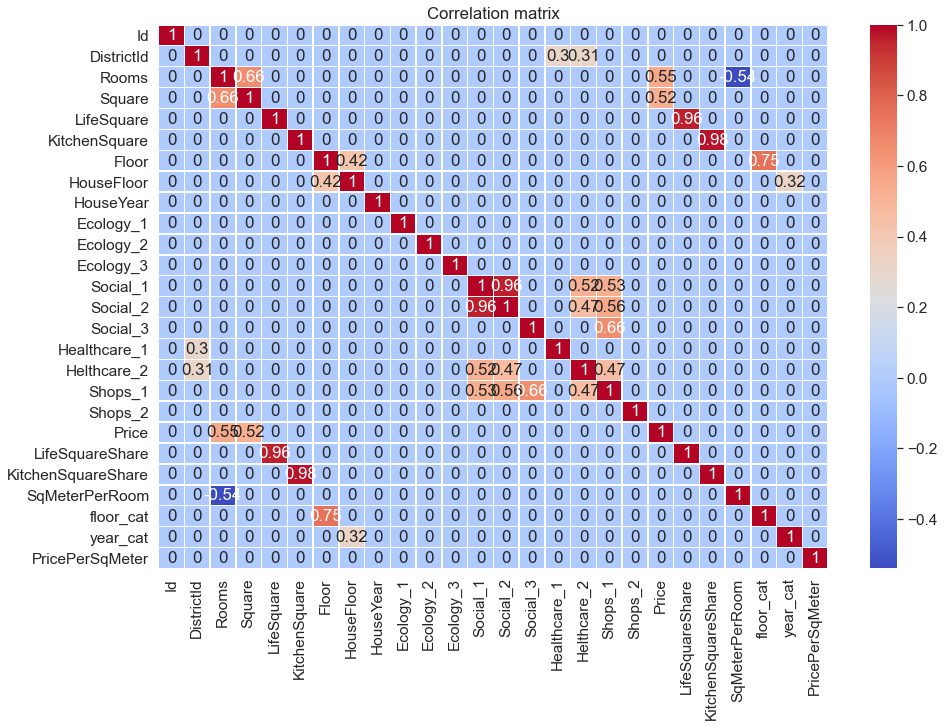

In [183]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [184]:
df.loc[df['Square'] < 17 , 'Rooms':'SqMeterPerRoom'].sort_values(['Square'], ascending=[False])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom
5617,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,1,1,...,11395,3,1406.0,3,4,0,77835.185808,1.009145,0.483464,5.515747
7767,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,1,1,...,8004,3,125.0,3,5,1,79913.267856,0.547428,0.000000,16.117154
4739,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,1,1,...,4756,16,2857.0,5,8,1,78388.806186,1.159887,0.507803,4.594955
212,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,1,1,...,8429,3,NaN,3,9,1,412511.088764,12.302704,0.181915,2.748531
3413,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,1,1,...,3433,4,2643.0,4,5,1,369472.403061,1.081930,0.194961,5.129222
8030,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,1,1,...,264,0,NaN,0,1,1,237716.681261,16.536747,0.000000,1.607893
1316,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,1,1,...,915,0,NaN,0,0,1,107604.269441,0.425158,0.215820,4.633498
9613,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,1,1,...,2787,2,520.0,0,7,1,483283.488083,1.025709,0.222085,4.502784
4900,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,1,1,...,1892,0,NaN,0,1,1,161379.067034,1.277984,0.227773,1.463444
3280,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,1,1,...,1892,0,NaN,0,1,1,97560.720383,9.314858,0.228273,4.380726


In [185]:
#! Внимание площадь меньше 17 кв.м. является аномалией для квартиры

In [186]:
df.loc[df['Floor'] > df['HouseFloor']].sort_values(['HouseFloor'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
4119,370,6,3.0,82.030903,78.922956,0.0,27,25.0,1977,0.243205,...,0,0,1,211498.637627,0.962112,0.000000,27.343634,5,3,2578.280002
6170,12744,6,2.0,62.333879,NaN,1.0,26,25.0,2014,0.243205,...,0,0,1,177378.175019,NaN,0.016043,31.166939,5,6,2845.614277
7697,5976,6,3.0,103.297933,NaN,0.0,26,25.0,1977,0.243205,...,0,0,1,271249.518401,NaN,0.000000,34.432644,5,3,2625.894937
2308,1471,23,2.0,62.348477,NaN,1.0,27,25.0,1977,0.075779,...,0,2,1,168381.124180,NaN,0.016039,31.174239,5,3,2700.645327
8232,7162,34,2.0,56.738764,57.510395,54.0,26,25.0,2016,0.069753,...,1,11,1,244220.621495,1.013600,0.951730,28.369382,5,6,4304.299309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,11654,34,2.0,56.978743,3.204071,0.0,12,0.0,1977,0.069753,...,1,11,1,250175.781800,0.056233,0.000000,28.489372,4,3,4390.686215
5152,7401,27,1.0,39.728069,NaN,0.0,5,0.0,1977,0.211401,...,0,1,1,91331.036926,NaN,0.000000,39.728069,2,3,2298.904502
5142,12424,74,1.0,50.176345,NaN,0.0,7,0.0,1977,0.309479,...,0,6,1,179563.737835,NaN,0.000000,50.176345,3,3,3578.653224
5118,9256,74,3.0,113.250848,NaN,1.0,14,0.0,1977,0.075779,...,0,2,1,372244.403093,NaN,0.008830,37.750283,4,3,3286.901693


In [187]:
#! Внимание Этажность квартиры выше этажности дома - это аномалия

### 7. Коректируем выбросы и аномалии

**Готовим функцию по траснформации данных**

In [188]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.mode = None
        self.DistrictId_counts = None
       
        
    def fit(self, df):
        """Сохранение статистик"""
        self.medians = df.median()
        
        df = df.copy()
        
        # DistrictID
        district = df['DistrictId'].value_counts()
        district = district[district > 50]  ## Если вы этого не сделаете, то на Leaderboard-е улетите в самый низ (>100 места, R2 ~ 0.65),
                                            ## Хотя на локальной валидации скор вырастет
        
        self.DistrictId_counts = dict(district)
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
            
        
        # Учитываем наши замечания выше - идущие по ходу анализа данных:
        
        # Внимание! в колонке Rooms есть значения = 0 - их надо заменить на значение Square/SqMeterPerRoom.mean() - Делим
        # общую площадь квартиры на среднюю по датасету площадь комнаты
        df.loc[(df['Rooms'] == 0), 'Rooms'] = df['Square'] / df['SqMeterPerRoom'].median()
        
        # Внимание! в колонке Rooms есть значения > 6 ,заменяем эти значения на медиану по кол-ву комнат в датасете
        df.loc[(df['Rooms'] > 5), 'Rooms'] = df['Rooms'].median()
        
        # корректируем значения ['Square'], ['LifeSquare'],['KitchenSquare']   < 15, 
        # т.к. таких квартир не бывает и по значению цены за кв.м. видим, 
        # что это просто данные занижены в 10 раз
        df.loc[(df['Square'] < 15), 'Square'] = df['Square'] * 10
       
        
        # если все равно остались данные ['Square']< 15 - просто удаляем их,
        # df = df[(df['Square'] > 15)]
        
        # корректируем значения ['Square'] > 1000, т.к. таких квартир не бывает и по значению цены за кв.м. видим, 
        # что это просто данные завышены в 100 раз
        df.loc[(df['Square'] > 1000), 'Square'] = df['Square'] / 100
        df.loc[(df['LifeSquare'] > 1000), 'LifeSquare'] = df['LifeSquare'] / 100
        df.loc[(df['KitchenSquare'] > 1000), 'KitchenSquare'] = df['KitchenSquare'] / 100
        
        # корректируем значения ['Square'], ['LifeSquare'],['KitchenSquare']  > 400, т.к.  по значению цены за кв.м. видим, 
        # что это просто данные завышены в 10 раз
        df.loc[(df['Square'] > 400), 'Square'] = df['Square'] / 10
        df.loc[(df['LifeSquare'] > 400), 'LifeSquare'] = df['LifeSquare'] / 10
        df.loc[(df['KitchenSquare'] > 32), 'KitchenSquare'] = df['KitchenSquare'] / 10
        
        
        
        # Заполняем пропуски в 'LifeSquareShare'
        # для расчета медианы берем 'LifeSquareShare' больше 0.5, т.к то что меньше - и пойдет в корректировку
        median = (df['LifeSquareShare']).median()
        df['LifeSquare'].fillna((median * df['Square']), inplace=True)
        
        # Обрабатываем аномалии в 'LifeSquare'
        # если 'LifeSquare' меньше 10- вероятнее всего знаение надо умножить на 10
        df['LifeSquareShare'] = df['LifeSquare'] / df['Square']
        df.loc[(df['LifeSquareShare'] < 0.5), 'LifeSquare'] = (median * df['Square'])
        
      
        df.loc[(df['LifeSquare'] > df['Square']),['LifeSquare','Square']] = df.loc[(df['LifeSquare'] > df['Square']),['Square','LifeSquare']].values
        
        
        #после ротации данных повторяем :
        df['LifeSquareShare'] = df['LifeSquare'] / df['Square']
        df.loc[(df['LifeSquareShare'] < 0.5), 'LifeSquare'] = (median * df['Square'])
        
        
        # В случае, если df['Floor'] > df['HouseFloor'], то, очевидно их надо поменять местами
        df.loc[(df['Floor'] > df['HouseFloor']),['Floor','HouseFloor']] = df.loc[(df['Floor'] > df['HouseFloor']),['HouseFloor','Floor']].values
        
        
        # Внимание! HouseFloor в 269 случаях = 0. Вариант - если Floor > 9, то HouseFloor = Floor;
        # Если Floor < 9, то HouseFloor = 9; Если Floor < 5, то HouseFloor = 5;
        df.loc[(df['HouseFloor'] == 0) & (df['Floor'] > 9), 'HouseFloor'] = df['Floor']
        df.loc[(df['HouseFloor'] == 0) & (df['Floor'] <= 9) & (df['Floor'] > 5), 'HouseFloor'] = 9
        df.loc[(df['HouseFloor'] == 0) & (df['Floor'] <= 5), 'HouseFloor'] = 5
         
        # Заполняем нулевые значения 'Floor' средним этажом дома, для одноэтажних домов 'Floor' == 1 
        df.loc[(df['Floor'] == 0), 'Floor'] = df.loc[(df['Floor'] == 0), 'HouseFloor'] // 2
        df.loc[(df['Floor'] == 0) & (df['HouseFloor'] == 1), 'Floor'] = 1
                
        # Убираем столбец Healthcare_1, который имеет почти половину пропусков
        df.drop('Healthcare_1', axis=1, inplace=True)
        
               
         # Зааполняем нулевые значения  и значения меньще 3 KitchenSquare
        df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = df['Square'] * self.medians['KitchenSquareShare']
        df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
       
        
        #Корректируем 0 в значениях ['DistrictId'
      
        #df.loc[df['DistrictId'] == 0, 'DistrictId'] = (df['DistrictId']).mode()
        
        # Корректируем выбросы по 'HouseYear'
        current_year = now = datetime.datetime.now().year
        
        df.loc[df['HouseYear'] > current_year, 'HouseYear'] = current_year
        
         # Убираем последнюю возможность для присутвия данных с кол-вом комнат меньше 1       
        df = df[(df['Rooms'] >= 1)]
        
        # Корректируем данные в столбцых вычислений после произведенных манипуляций:
        # Доля жилой площади в общей площади
        df['LifeSquareShare'] = df['LifeSquare'] / df['Square']

        #  Доля площади кухни в общей площади
        df['KitchenSquareShare'] = df['KitchenSquare'] / df['Square']
        
        #  Цена за кв.м. (сделаем отдельно для df ниже)
        #df['PricePerSqMeter'] = df['Price'] / df['Square']
        
        #  Средняя площадь комнаты к квартире        
        df['SqMeterPerRoom'] = df['Square'] / df['Rooms']
       
    
    #Оставляем только те значения DistrictId которые имеют более 50 наблюдений
    
        df['DistrictId_count'] = df['DistrictId'].map(self.DistrictId_counts)  # self.DistrictId_counts = {'id': value}
        df['new_district'] = 0
        df.loc[df['DistrictId_count'].isna(), 'new_district'] = 1
        
        df['DistrictId_count'].fillna(5, inplace=True)
        
        return df


**Делаем трансформацию и постпроцессинг**

In [189]:
pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)
df_final = pipe.transform(df_final)

In [190]:
df['DistrictId'].value_counts()

27     850
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [191]:
# Отдельно для  train работаем с 'PricePerSqMeter' и 'Price'
#  Цена за кв.м. корректируем опять
df['PricePerSqMeter'] = df['Price'] / df['Square']

# корректируем значения Price и  PricePerSqMeter с выбросами в диапазоне более 10000 и менее 500
df.loc[(df['PricePerSqMeter'] > 10000), 'Price'] = df['PricePerSqMeter'].median() * df['Square']
df.loc[(df['PricePerSqMeter'] > 10000), 'PricePerSqMeter'] = df['PricePerSqMeter'].median() 
        
df.loc[(df['PricePerSqMeter'] < 500), 'Price'] = df['PricePerSqMeter'].median() * df['Square']
df.loc[(df['PricePerSqMeter'] < 500), 'PricePerSqMeter'] = df['PricePerSqMeter'].median() 

# если все равно остались данные ['Square']< 15 - просто удаляем их,
df = df[(df['Square'] > 15)]

In [192]:
 # меняем тип данных на строку в DistrictId и Id
df['DistrictId'] = df['DistrictId'].astype(str)
df_final['DistrictId'] = df_final['DistrictId'].astype(str)
df['Id'] = df['Id'].astype(str)


### 8. Проверяем наши результаты в измененом Датафрейме:

In [193]:
df.loc[:, 'DistrictId':'PricePerSqMeter'].describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,...,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.888698,56.342145,37.447598,7.764833,7.816563,13.437988,1984.873975,0.118879,0.990298,0.972494,...,1.319764,4.232046,0.917483,213810.623048,0.660146,0.143516,32.534106,3.346169,3.812663,3879.309617
std,0.811640,19.246008,15.797524,2.529295,5.199622,6.092458,18.417852,0.119028,0.098024,0.163559,...,1.493633,4.806526,0.275164,92476.013022,0.123828,0.042592,10.154531,1.299691,1.168512,1232.809992
min,1.000000,16.117154,8.822988,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.500022,0.018972,5.566190,1.000000,1.000000,537.979605
25%,1.000000,41.881974,26.093398,6.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,...,0.000000,1.000000,1.000000,153824.743388,0.601397,0.120688,25.628640,2.000000,3.000000,2910.140229
50%,2.000000,52.648138,33.823345,7.919860,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,...,1.000000,3.000000,1.000000,192113.654461,0.617527,0.120688,30.891317,3.000000,3.000000,3904.840294
75%,2.000000,65.997862,45.162719,9.000000,11.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,...,2.000000,6.000000,1.000000,248995.332643,0.667449,0.164592,39.107471,4.000000,5.000000,4687.241435
max,5.000000,275.645284,233.949309,32.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,...,6.000000,23.000000,1.000000,633233.466570,0.999949,0.610348,174.837082,6.000000,6.000000,9930.586635


In [194]:
df.loc[df['DistrictId'] == '27'].sort_values(['DistrictId'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district
14,10953,27,1.0,53.769097,52.408027,6.489287,4.0,5.0,1977,0.072158,...,0,140647.565937,0.974687,0.120688,53.769097,2,3,2615.769530,851.0,0
6431,11078,27,2.0,52.900394,34.611388,8.000000,4.0,12.0,1988,0.211401,...,1,179144.684380,0.654275,0.151228,26.450197,2,4,3386.452721,851.0,0
6467,3534,27,1.0,39.236713,23.417777,8.000000,3.0,4.0,2003,0.041116,...,1,159549.259984,0.596833,0.203891,39.236713,2,5,4066.325801,851.0,0
6482,11126,27,3.0,47.938819,29.603515,5.785642,5.0,25.0,1977,0.072158,...,0,132867.424433,0.617527,0.120688,15.979606,2,3,2771.604051,851.0,0
6489,10417,27,3.0,120.795231,117.870532,14.578540,10.0,12.0,2019,0.072158,...,0,240807.797348,0.975788,0.120688,40.265077,4,6,1993.520731,851.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,8285,27,3.0,82.696732,81.036750,10.000000,14.0,14.0,2018,0.072158,...,0,240748.581768,0.979927,0.120924,27.565577,6,6,2911.222454,851.0,0
3172,1682,27,1.0,38.140866,23.553014,4.603146,6.0,12.0,1977,0.011654,...,1,116722.025276,0.617527,0.120688,38.140866,4,3,3060.287794,851.0,0
3185,13301,27,1.0,37.645820,23.247310,4.543400,4.0,16.0,2016,0.211401,...,1,88993.155433,0.617527,0.120688,37.645820,2,6,2363.958467,851.0,0
3186,2154,27,1.0,44.153619,41.779337,10.000000,5.0,20.0,2016,0.011654,...,1,134173.536187,0.946227,0.226482,44.153619,2,6,3038.789074,851.0,0


In [195]:
df.loc[df['PricePerSqMeter'] < 1000].sort_values(['PricePerSqMeter'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district
9751,6627,36,3.0,86.594116,54.695269,10.0,7.0,17.0,2008,0.087619,...,1,85537.735405,0.631628,0.115481,28.864705,3,5,987.800779,5.0,1
4442,14825,152,3.0,88.978324,56.939045,12.0,7.0,7.0,1958,0.042032,...,1,85499.969325,0.639920,0.134864,29.659441,6,3,960.907842,5.0,1
8373,14892,57,3.0,84.206197,49.920840,8.0,7.0,7.0,2005,0.090799,...,1,71319.376419,0.592840,0.095005,28.068732,6,5,846.961137,107.0,0
3723,203,33,4.0,101.554252,62.712492,9.0,4.0,5.0,1958,0.051942,...,1,82342.775873,0.617527,0.088623,25.388563,2,3,810.825491,5.0,1
696,7590,113,3.0,94.417148,56.749169,11.0,6.0,18.0,2008,0.050756,...,1,71057.273346,0.601047,0.116504,31.472383,3,5,752.588644,5.0,1
6332,8961,27,1.0,164.153360,101.369132,6.0,3.0,5.0,1965,0.211401,...,1,104891.073757,0.617527,0.036551,164.153360,2,3,638.982193,851.0,0
4739,12676,81,3.0,137.848648,85.125262,7.0,4.0,5.0,1960,0.319809,...,1,78388.806186,0.617527,0.050780,45.949549,2,3,568.658507,5.0,1
590,14990,23,2.0,263.542020,162.744313,5.0,5.0,6.0,1972,0.075779,...,1,141780.231857,0.617527,0.018972,131.771010,3,3,537.979605,565.0,0


In [196]:
df.loc[df['Rooms'] < 1].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district


In [197]:
df.loc[df['Rooms'] > 5].sort_values(['Square'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district


In [198]:
df.loc[df['Square'] > 200 , 'Rooms':'SqMeterPerRoom'].sort_values(['Square'], ascending=[False])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom
1982,5.0,275.645284,233.949309,26.000000,12.0,37.0,2011,0.161976,1,0,31,7010,5,3,7,1,455264.882666,0.848733,0.094324,55.129057
590,2.0,263.542020,162.744313,5.000000,5.0,6.0,1972,0.075779,1,1,6,1437,3,0,2,1,141780.231857,0.617527,0.018972,131.771010
1981,2.0,212.932361,211.231125,25.698389,2.0,3.0,2008,0.211401,1,1,9,1892,0,0,1,1,302211.260887,0.992010,0.120688,106.466181
9910,4.0,201.627361,200.334539,25.000000,1.0,2.0,2013,0.041116,1,1,53,14892,4,1,4,1,528560.506016,0.993588,0.123991,50.406840


In [199]:
df.loc[df['Square'] < 17 , 'Rooms':'SqMeterPerRoom'].sort_values(['Square'], ascending=[False])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom
5617,3.0,16.698571,16.547242,8.0,5.0,5.0,1962,0.133215,1,1,49,11395,3,3,4,0,77835.185808,0.990938,0.479083,5.566190
7767,1.0,16.117154,8.822988,3.0,2.0,5.0,1965,0.194489,1,1,47,8004,3,3,5,1,79913.267856,0.547428,0.186137,16.117154


In [200]:
df.loc[df['PricePerSqMeter'] > 1000].sort_values(['PricePerSqMeter'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district
8546,8097,43,2.0,55.637752,32.077201,9.000000,2.0,5.0,1958,7.815280e-05,...,1,552515.519533,0.576537,0.161761,27.818876,2,3,9930.586635,5.0,1
422,4294,183,1.0,37.774297,19.477766,6.000000,8.0,13.0,1971,3.731645e-02,...,1,360914.098453,0.515635,0.158838,37.774297,3,3,9554.488763,5.0,1
436,4933,157,3.0,54.289523,39.041307,5.000000,7.0,8.0,1961,0.000000e+00,...,1,503712.153979,0.719132,0.092099,18.096508,3,3,9278.257064,5.0,1
5240,12304,104,3.0,61.690768,43.802429,4.000000,2.0,7.0,1936,7.815280e-05,...,1,566435.153460,0.710032,0.064840,20.563589,2,1,9181.846361,5.0,1
8722,1956,116,2.0,55.603098,32.204340,9.000000,14.0,14.0,2003,1.800000e-09,...,1,502864.776935,0.579182,0.161861,27.801549,6,5,9043.826572,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,7243,9,2.0,58.089253,52.460857,8.000000,5.0,22.0,1981,1.362444e-01,...,1,59877.592523,0.903108,0.137719,29.044626,2,4,1030.786069,294.0,0
9046,15849,3,3.0,74.478225,47.539158,10.000000,8.0,17.0,1984,5.090006e-02,...,1,76652.041207,0.638296,0.134267,24.826075,3,4,1029.187270,82.0,0
5421,1205,23,2.0,148.671938,100.201652,17.942925,1.0,3.0,2013,1.407296e-02,...,1,152464.848743,0.673978,0.120688,74.335969,1,6,1025.511945,565.0,0
6910,1170,140,3.0,129.998756,79.621208,11.000000,21.0,22.0,2012,2.386171e-01,...,1,132176.743972,0.612477,0.084616,43.332919,5,6,1016.753916,5.0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


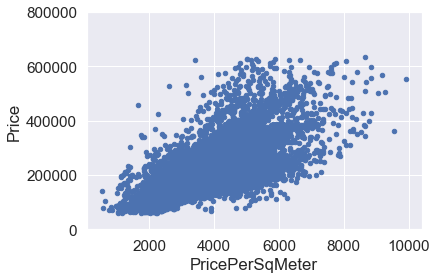

In [201]:
#scatter plot Square/PricePerSqMeter
var = 'PricePerSqMeter'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000));

In [202]:
df1 = df[['DistrictId','Square']].groupby('DistrictId').sum().sort_values('Square')
df1 = df1.copy()
df1.head(200)

,Square
DistrictId,
209,33.533077
205,43.226985
196,47.080098
117,65.437471
174,65.812757
...,...
52,8144.798779
53,9344.109231
58,9836.136039


In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 209 to 27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Square  205 non-null    float64
dtypes: float64(1)
memory usage: 3.2+ KB


In [204]:
df1['index_old'] = df1.index
df1.reset_index().index
df1 = df1.copy()
df1

,Square,index_old
DistrictId,,
209,33.533077,209
205,43.226985,205
196,47.080098,196
117,65.437471,117
174,65.812757,174
...,...,...
9,17388.768281,9
6,29716.076636,6
23,32299.338045,23


In [205]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 209 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Square     205 non-null    float64
 1   index_old  205 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [206]:
#df1['index_new']

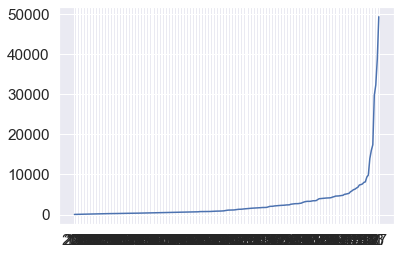

In [207]:
plt.plot(df1['Square'])

plt.show()

In [208]:
df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
LifeSquareShare       0
KitchenSquareShare    0
SqMeterPerRoom        0
floor_cat             0
year_cat              0
PricePerSqMeter       0
DistrictId_count      0
new_district          0
dtype: int64

In [209]:
df.loc[df['Floor'] > df['HouseFloor']].sort_values(['Floor'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district


In [210]:
df.loc[df['Floor'] < 1].sort_values(['Floor'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district


In [211]:
df.loc[df['KitchenSquare'] < 3].sort_values(['KitchenSquare'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district


In [212]:
df.loc[df['PricePerSqMeter']< 1000 ].sort_values(['PricePerSqMeter'], ascending=[False])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district
9751,6627,36,3.0,86.594116,54.695269,10.0,7.0,17.0,2008,0.087619,...,1,85537.735405,0.631628,0.115481,28.864705,3,5,987.800779,5.0,1
4442,14825,152,3.0,88.978324,56.939045,12.0,7.0,7.0,1958,0.042032,...,1,85499.969325,0.639920,0.134864,29.659441,6,3,960.907842,5.0,1
8373,14892,57,3.0,84.206197,49.920840,8.0,7.0,7.0,2005,0.090799,...,1,71319.376419,0.592840,0.095005,28.068732,6,5,846.961137,107.0,0
3723,203,33,4.0,101.554252,62.712492,9.0,4.0,5.0,1958,0.051942,...,1,82342.775873,0.617527,0.088623,25.388563,2,3,810.825491,5.0,1
696,7590,113,3.0,94.417148,56.749169,11.0,6.0,18.0,2008,0.050756,...,1,71057.273346,0.601047,0.116504,31.472383,3,5,752.588644,5.0,1
6332,8961,27,1.0,164.153360,101.369132,6.0,3.0,5.0,1965,0.211401,...,1,104891.073757,0.617527,0.036551,164.153360,2,3,638.982193,851.0,0
4739,12676,81,3.0,137.848648,85.125262,7.0,4.0,5.0,1960,0.319809,...,1,78388.806186,0.617527,0.050780,45.949549,2,3,568.658507,5.0,1
590,14990,23,2.0,263.542020,162.744313,5.0,5.0,6.0,1972,0.075779,...,1,141780.231857,0.617527,0.018972,131.771010,3,3,537.979605,565.0,0


In [213]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Shops_2,Price,LifeSquareShare,KitchenSquareShare,SqMeterPerRoom,floor_cat,year_cat,PricePerSqMeter,DistrictId_count,new_district
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,...,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.888698,56.342145,37.447598,7.764833,7.816563,13.437988,1984.873975,0.118879,0.990298,0.972494,...,0.917483,213810.623048,0.660146,0.143516,32.534106,3.346169,3.812663,3879.309617,237.213143,0.235447
std,0.811640,19.246008,15.797524,2.529295,5.199622,6.092458,18.417852,0.119028,0.098024,0.163559,...,0.275164,92476.013022,0.123828,0.042592,10.154531,1.299691,1.168512,1232.809992,272.968290,0.424299
min,1.000000,16.117154,8.822988,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,...,0.000000,59174.778028,0.500022,0.018972,5.566190,1.000000,1.000000,537.979605,5.000000,0.000000
25%,1.000000,41.881974,26.093398,6.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,...,1.000000,153824.743388,0.601397,0.120688,25.628640,2.000000,3.000000,2910.140229,55.000000,0.000000
50%,2.000000,52.648138,33.823345,7.919860,7.000000,14.000000,1977.000000,0.075424,1.000000,1.000000,...,1.000000,192113.654461,0.617527,0.120688,30.891317,3.000000,3.000000,3904.840294,104.000000,0.000000
75%,2.000000,65.997862,45.162719,9.000000,11.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,...,1.000000,248995.332643,0.667449,0.164592,39.107471,4.000000,5.000000,4687.241435,511.000000,0.000000
max,5.000000,275.645284,233.949309,32.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,...,1.000000,633233.466570,0.999949,0.610348,174.837082,6.000000,6.000000,9930.586635,851.000000,1.000000


**Сохраняем файл с готовым для модели датасетом**

In [214]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')
df_final.to_csv(PREPARED_TEST_DATASET_PATH, index=False, encoding='utf-8')

### 8. Начинаем формировать модель

In [215]:
DATASET_PATH = 'train.csv'
PREPARED_DATASET_PATH = 'prepared_train.csv'


X = pd.read_csv(PREPARED_DATASET_PATH, sep=',')

y = X[['Price']]
X = X.drop('Price', axis=1)


X_final = pd.read_csv('prepared_test.csv')

# сразу создаем
preds_final = pd.DataFrame()
preds_final['Id'] = X_final['Id'].copy()

X.set_index('Id', inplace=True)
X_final.set_index('Id', inplace=True)

print('Строк в трейне:' ,  X.shape[0])
print('Строк в тесте', X_final.shape[0])

Строк в трейне: 9998
Строк в тесте 5000


In [216]:
y.head(10)

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644
5,215898.447742
6,296021.204377
7,221244.156664
8,229102.795999
9,95380.220993


### 9. Выбираем фичи по которым строится прогностическая модель 

In [217]:
list(X)

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'LifeSquareShare',
 'KitchenSquareShare',
 'SqMeterPerRoom',
 'floor_cat',
 'year_cat',
 'PricePerSqMeter',
 'DistrictId_count',
 'new_district']

In [218]:
remain_features = ['DistrictId', 
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1', 
 'Social_2',
 'Social_3', 'DistrictId_count', 
 'LifeSquareShare',
 'KitchenSquareShare',
 'SqMeterPerRoom'
 ]

In [219]:
X = X[remain_features]
X_final = X_final[remain_features]

### 10. Строим модель

In [220]:
np.any(np.isnan(X))

False

In [221]:
np.all(np.isfinite(X))

True

**LightGBM regressor Модель**

In [222]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

GridSearchCV дал следующие лучшие параметры по модели LGBMRegressor:

{'max_depth': 9,

 'max_features': 5,
 
 'min_samples_leaf': 5,
 
 'n_estimators': 150,
 
 'random_state': 21}

In [223]:
model = LGBMRegressor(max_depth=9, min_samples_leaf=5, n_estimators=150, random_state=100)
cv_score = cross_val_score(model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=42))
cv_score
mean = cv_score.mean()
std = cv_score.std()

print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.752 +- 0.019


In [224]:
cv_score = cross_val_score(model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.76361653, 0.7447824 , 0.7552582 ])

### 11. Обучаем модель на всем трейне

In [225]:
model.fit(X, y)

LGBMRegressor(max_depth=9, min_samples_leaf=5, n_estimators=150,
              random_state=100)

### 12. Анализ значимости фичей

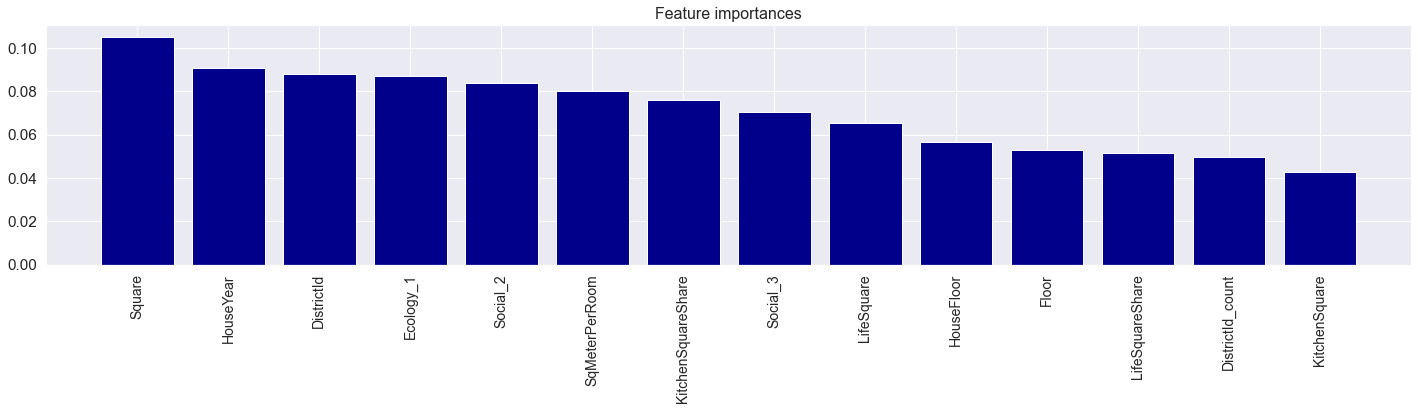

In [226]:
def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    # plt.savefig('fe.jpg')
    plt.show()
    
plot_feature_importances(importances = model.feature_importances_, X=X)

### 13. Формируем финальный файл предсказаний для загрузки в Kaggle

In [227]:
y_pred_final = model.predict(X_final)

preds_final['Price'] = y_pred_final
preds_final.to_csv('predictions_final.csv', index=False)

preds_final.head()

,Id,Price
0,725,156560.730907
1,15856,227680.545125
2,5480,360774.232820
3,15664,345318.730864
4,14275,141496.094829


### 14. Проверка финального файла предсказаний для загрузки в Kaggle

In [228]:
preds_final.shape

(5000, 2)

In [229]:
preds_final.describe()

,Id,Price
count,5000.000000,5000.000000
mean,8412.595400,215516.026928
std,4832.674037,80621.057562
min,1.000000,66471.755550
25%,4221.750000,163427.744072
50%,8320.500000,195444.722263
75%,12598.250000,246913.167859
max,16795.000000,592613.700454
